## (1) Data Preprocessing

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as matplot
import sklearn as sklearn
%matplotlib inline

In [3]:
file = 'F:\V.I.T\Data Project\Projects\HR Employee Attrition\HR-Employee-Attrition.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['WA_Fn-UseC_-HR-Employee-Attriti', 'Data Definitions']


In [4]:
df = xl.parse('WA_Fn-UseC_-HR-Employee-Attriti')

In [5]:
# checking missing values
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [6]:
# Size of the Given Dataset [(Rows,Columns) or (Instances,Features)]

df.shape

(1470, 35)

In [7]:
# QuickOverview of Data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
# Move Target Variable "Attrition" to the front of the table
front = df['Attrition']
df.drop(labels = ['Attrition'], axis=1, inplace = True)
df.insert(0, 'Attrition', front)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# Checking Data Types of all the Features present in the Given Dataset
# The Given Dataset consist of Combination of Both Numerical as well as Categorical values

df.dtypes

Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
# checking Attrition Rate for the given data
# How many Employees stayed and How many Employees Left
# As per the Given Data approximately 84% of the Employees stayed and 16% of the Employees left

attrition_rate = df.Attrition.value_counts()/len(df)
attrition_rate 

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [11]:
# Out of 1470 Employees, 'Employees Stayed = 1233,  Employees Left = 237'
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

#### Here in the given dataset, it is clearly visible that the Features like ['Employee Number', 'Employee Count', 'Over 18', 'Standard Hours'] are of no importance in determing the Attrition Rate and Hence, are irrelevant.
#### Reason: Either the feature has same value for all the given instances or feature is just denoting the serial number of the instances.

In [12]:
# Removing selected Features from the datset on the basis of the knowledge of the given datset.
df.drop(columns=['StandardHours', 'EmployeeNumber', 'EmployeeCount', 'Over18'], inplace = True)

In [13]:
df.shape

(1470, 31)

In [14]:
# Remaining Attributes
df.columns.values

array(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

### For the ease of Classification Convert the Categorical Values into Numerical Values

In [15]:
df.Attrition.replace(('Yes', 'No'),(1,0), inplace = True)
df.OverTime.replace(('Yes', 'No'), (1,0), inplace = True)
df.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [16]:
# Seperate the Dataset int 'Categorical' and 'Numerical' Data
numeric_data = df.select_dtypes(include=[np.number])
categorical_data = df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical Columns in Dataset".format(numeric_data.shape[1], categorical_data.shape[1]))

There are 25 numeric and 6 categorical Columns in Dataset


## (2) Data Exploration

In [17]:
# Statistical information about the Employee Data
df.describe()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


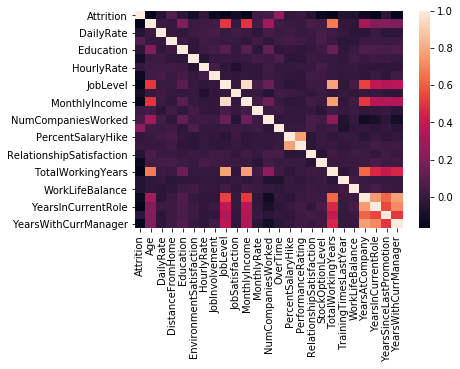

In [18]:
# Correlation Plot
corr = numeric_data.corr()
sns.heatmap(corr)

## Overview of summary (Attrition vs Non-Attrition)
 
#### Here we can see that Features such as ['Job Level', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'JobRole', 'OverTime' ] are affecting the turnover rate comparetively at a greater extent.

In [19]:
# Top 15 Values
print (corr['Attrition'].sort_values(ascending=False)[:15], '\n')

# Last 5 Values
print (corr['Attrition'].sort_values(ascending=False)[-5:])

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
Name: Attrition, dtype: float64 

Age                  -0.159205
MonthlyIncome        -0.159840
YearsInCurrentRole   -0.160545
JobLevel             -0.169105
TotalWorkingYears    -0.171063
Name: Attrition, dtype: float64


In [20]:
categorical_data.describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
count,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married
freq,1043,961,606,882,326,673


In [21]:
Attrition_summary = df.groupby('Attrition')
Attrition_summary.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


## Distribution Plot

### Distribution Plots of all the critical features that may affect Attrition Rate. 

## Histogram Plots of all the Numeric Features(Variables)

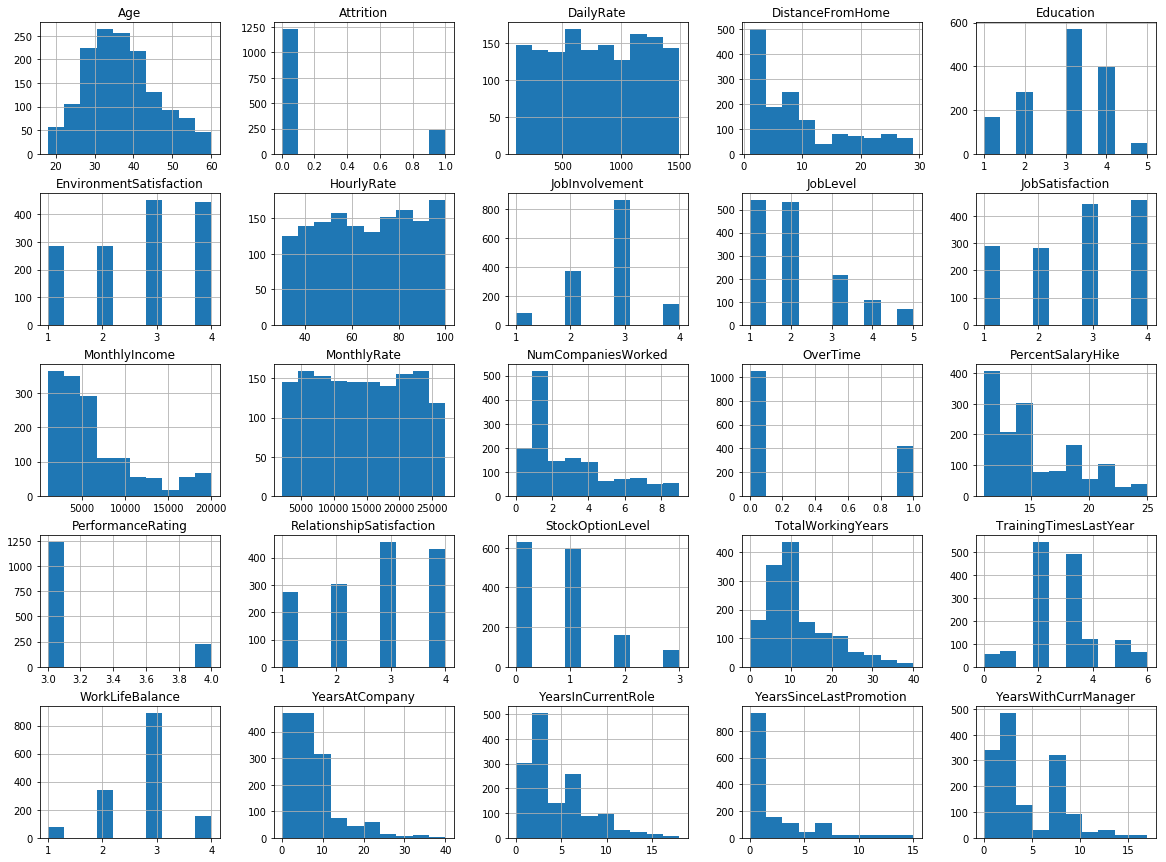

In [22]:
num_bins = 10

df.hist(bins = num_bins, figsize=(20,15))
plt.savefig("Data_Histogram_Plots")
plt.show()

## Bar Plots

### Bar Plot to Visualise the Effect of the 'Department' and 'Job Role' on the 'Attrition Rate' 

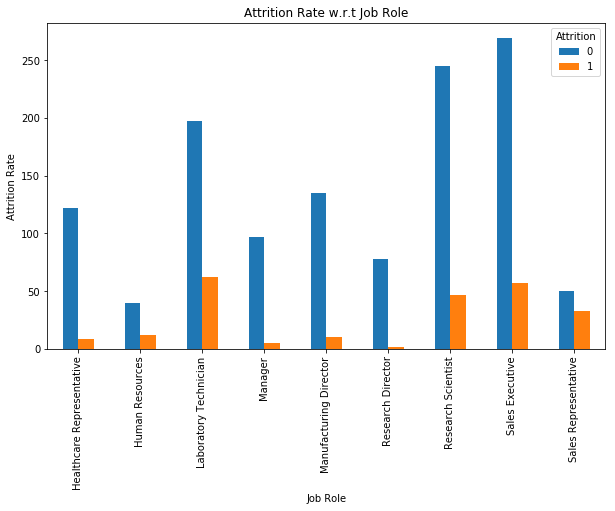

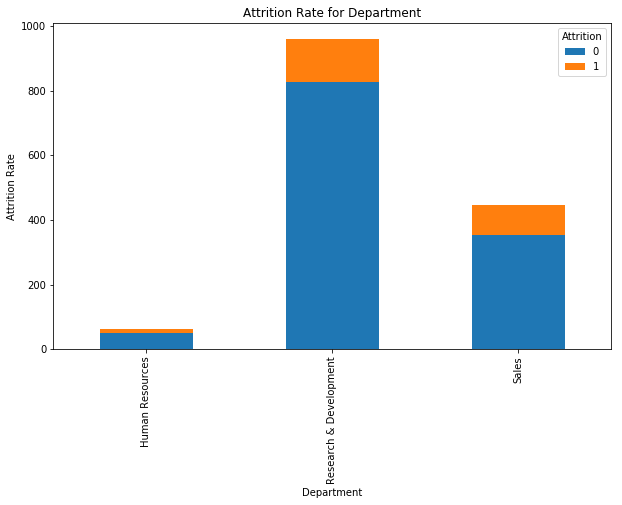

In [23]:
# On the basis of the Department Bar Chart it can be concluded that department ['Resaerch and Development', and 'Sales'] undergo high Attrition as compared to 'Human Resource'
# And On going further into the Job Role it can be seen that 'Job Role' such as [Laboratory Technician, Sales Executive, Research Scientist, Sales Representative] have comparetively higher Attrition Rate

pd.crosstab(df.JobRole,df.Attrition).plot(kind='bar', figsize=(10,6))
plt.title('Attrition Rate w.r.t Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.savefig('Job_Role_bar_chart')

pd.crosstab(df.Department,df.Attrition).plot(kind='bar',figsize=(10,6), stacked= True)
plt.title('Attrition Rate for Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.savefig('Department_bar_chart')

### Bar Plot  for 'Over Time' vs 'Attrition Rate'

#### Bar Plot for Over Time conveys that Employees that do Over Time are more likely to go for Attrition as compared to the Employees that do not work Over Time

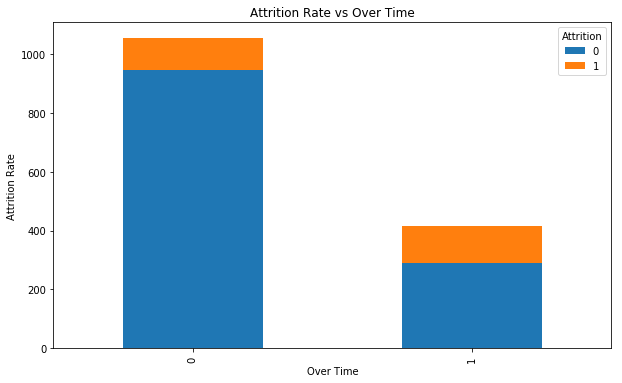

In [24]:
pd.crosstab(df.OverTime,df.Attrition).plot(kind='bar', figsize=(10,6), stacked= True)
plt.title('Attrition Rate vs Over Time')
plt.xlabel('Over Time')
plt.ylabel('Attrition Rate')
plt.savefig('Over_Time_bar_chart')

## Bar Chart for Employee Salary(Monthly Income) vs Attrition Rate

In [ ]:
## pd.crosstab(df.MonthlyIncome, df.Attrition).plot(kind='bar', stacked = True, figsize=(12,8))
#plt.title('Attrition Rate vs Salary(Monthly Income)')
#plt.xlabel('Monthly Income')
#plt.ylabel('Attrition Rate')
#plt.savefig('Salary_bar_chart')

### # Now I will be using Label Encoder to Convert Categorical Data(Features) into Numerical Data

In [25]:
from sklearn.preprocessing import LabelEncoder

model = LabelEncoder()
df['MaritalStatus'] = model.fit_transform(df['MaritalStatus'].astype('str'))
df['JobRole'] = model.fit_transform(df['JobRole'].astype('str'))
df['Gender'] = model.fit_transform(df['Gender'].astype('str'))
df['EducationField'] = model.fit_transform(df['EducationField'].astype('str'))
df['BusinessTravel'] = model.fit_transform(df['BusinessTravel'].astype('str'))
df['Department'] = model.fit_transform(df['Department'].astype('str'))


In [26]:
df_vars = df.columns.values.tolist()
y=['Attrition']
X=[i for i in df_vars if i not in y]

In [27]:
df.columns.values

array(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [28]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(df[X], df[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\lucky\Anaconda2\envs\py36-2\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False False False  True False False False  True  True False  True  True
 False  True  True False False False  True False False False  True False
 False  True False False False False]
[17 14 18  1 15 16 11  1  1 19  1  1 12  1  1 20 21  7  1 13  6  2  1 10
  5  1  9  3  4  8]


#### You can see that RFE chose 10 variables for us which are marked 'True' in the support_array and marked with a choice '1' in the Ranking Array

In [31]:
cols = ['Department', 'EnvironmentSatisfaction','Gender', 'JobInvolvement', 'JobLevel', 'JobSatisfaction','MaritalStatus', 'OverTime', 'StockOptionLevel', 'WorkLifeBalance']
X = df[cols]
y = df['Attrition']

## (1) Logistic Regression Model

In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
from sklearn.metrics import accuracy_score
print('Logistic Regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic Regression accuracy: 0.855


## (2) Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.841


## (3) Support Vector Machines(SVM)

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [37]:
print('Support Vector Machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support Vector Machine accuracy: 0.857


## Cross Validation

In [38]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits= 15, random_state = 7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv = kfold)
print("15-fold cross validation average accuracy: %.3f"%(results.mean()))

15-fold cross validation average accuracy: 0.830


### The average accuracy remains very close to the 'Random Forest model' accuracy; Hence, we can conclude that the model Generalizes well       

## Precision and Recall

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91       371
          1       0.50      0.29      0.36        70

avg / total       0.82      0.84      0.82       441



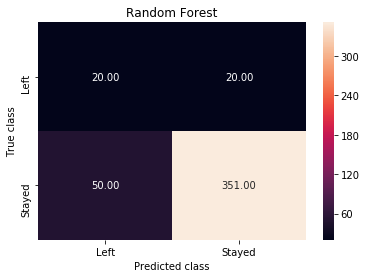

In [40]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

## Logistic Regression

In [41]:
print(classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.86      0.98      0.92       371
          1       0.65      0.19      0.29        70

avg / total       0.83      0.85      0.82       441



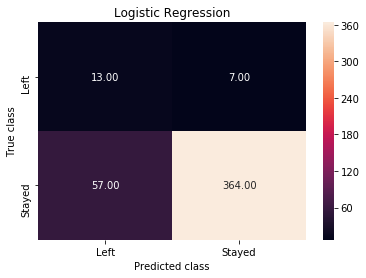

In [42]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

## Support Vector Machine

In [43]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.86      1.00      0.92       371
          1       0.89      0.11      0.20        70

avg / total       0.86      0.86      0.81       441



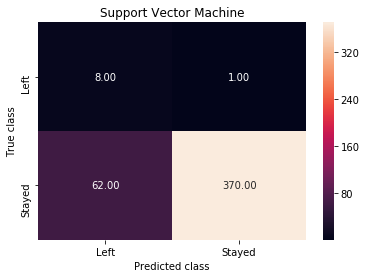

In [44]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

## ROC Curve

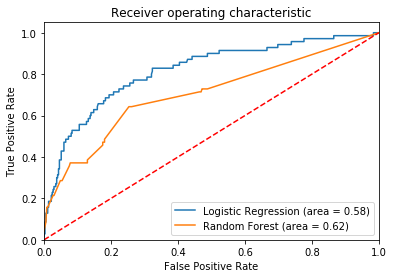

In [45]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

## Now to show Comparison between Accuracy of the Models After Festure Selection and Before Feature Selection I will be using all the models again on the Complete Dataset.

In [58]:
df.columns.values

array(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [82]:
cols_2 = ['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
X_2 = df[cols]
y_2 = df['Attrition']